<a href="https://colab.research.google.com/github/tgrappoport/2dmat/blob/master/01_tight_binding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poço Quântico

**Vamos gerar um Hamiltoniano unidimensional de um poço infinito e o resolver utilizando o método de diferenças finitas**

Para começarmos nossa jornada nas propriedades quânticas de materiais 2D, vamos ao básico e tentamos resolver a equação de Schrödinger independente do tempo para uma partícula em um poço infinito:

$$
H\psi(x) = E\psi(x)
$$

onde

$$
H = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2}
$$

para \$V(x) = 0\$ dentro do poço. Para simplificar, definimos \$t = \hbar / 2ma\$.
Nossa aproximação por diferenças finitas para o operador derivada segunda é
\$H\_n = t\[\psi(n-1) - 2\psi(n) + \psi(n+1)]\$
(ver [https://pt.wikipedia.org/wiki/Método\_das\_diferen%C3%A7as\_finitas](https://pt.wikipedia.org/wiki/Método_das_diferen%C3%A7as_finitas))

O resultado analítico é dado por:

$$
E_n = t\left(\frac{\pi n a}{L}\right)^2
$$

e o resultado numérico será válido para valores pequenos de \$n\$, ou seja, quando \$n\pi a/L \ll 1\$.

Abaixo, importamos os pacotes Python necessários, incluindo `numpy` para cálculos matemáticos, `matplotlib` para gráficos e `seaborn` para gráficos mais bonitos.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

# seaborn setting
sns.set(style="ticks")
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

**Definição da matriz Hamiltoniana onde $L$ é o tamanho da caixa**


In [ ]:
L = 301
t = 1  # hbar/(2ma^2)
H = [
    [
        2 * t if (i == j) else -t if (j == (i + 1)) else -t if (j == (i - 1)) else 0
        for i in range(L)
    ]
    for j in range(L)
]


In [ ]:
#diagonalização. Leia np.linalg.eigen para detalhes
en, v = np.linalg.eigh(H)

Text(0, 0.5, '$E_n$(t)')

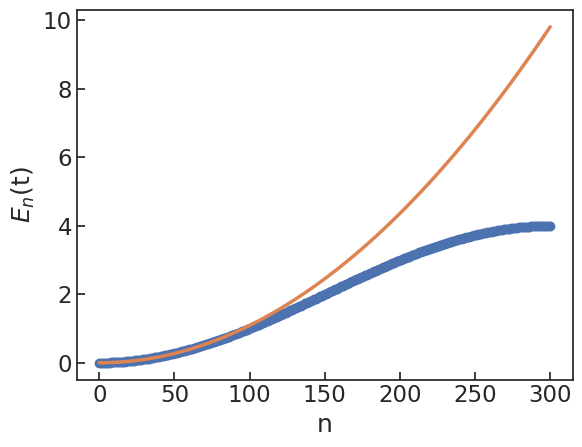

In [ ]:
# plot energias numericase e analíticas
k = np.pi * np.arange(L) / (L)
plt.plot(en, "o-")
plt.plot(k * k, "-")
plt.xlabel("n")
plt.ylabel("$E_n$(t)")


Text(0, 0.5, '$\\psi^2(x)$')

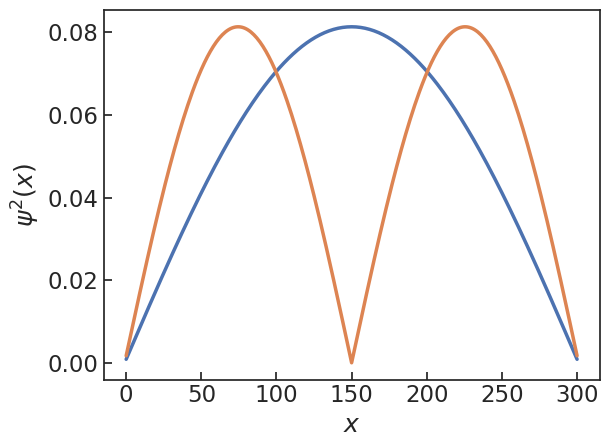

In [ ]:
# Probability function
v0 = v[:,0]
psi2 = np.sqrt(v * np.conj(v))
plt.plot(psi2[0])
plt.plot(psi2[1])
plt.xlabel('$x$')
plt.ylabel('$\psi^2(x)$')

(0.0, 300.0)

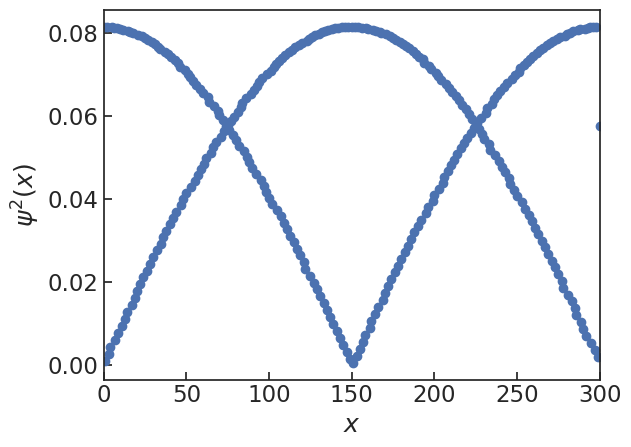

In [ ]:
Hp = H
Hp[0][L - 1] = t
Hp[L - 1][0] = t
ep, vp = np.linalg.eigh(Hp)
psi2 = np.sqrt(vp * np.conj(vp))
plt.plot(psi2[1],marker='o',linestyle = 'None')
plt.xlabel('$x$')
plt.ylabel('$\psi^2(x)$')
plt.xlim(0,300)

# Introdução ao modelo tight-binding

(Baseado no https://solidstate.quantumtinkerer.tudelft.nl)

Nosso objetivo é entender o espectro de energia dos elétrons em sólidos. Para isso, começaremos com o básico: os átomos.

Em princípio, sabemos como calcular as energias dos elétrons em sólidos porque **tudo** é descrito pela equação de Schrödinger:

$$
\hat{H}\psi = E\psi,
$$

onde $H$ é o Hamiltoniano, que é a soma dos operadores de energia cinética e potencial.
No átomo de hidrogênio, a energia potencial é devida à interação de Coulomb entre o elétron e o núcleo:

$$
\hat{H}=-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial {\mathbf r^2}} - \frac{e^2}{4\pi\varepsilon_0|r|}.
$$

No caso do hélio, o Hamiltoniano já se torna muito mais complexo: ele contém não apenas a atração de Coulomb entre os elétrons e os núcleos, mas também a repulsão de Coulomb entre os dois elétrons:

$$
\hat{H}=-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial {\mathbf r_1^2}} -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial {\mathbf r_2^2}}- \frac{2e^2}{4\pi\varepsilon_0|r_1|} - \frac{2e^2}{4\pi\varepsilon_0|r_2|} + \frac{e^2}{4\pi\varepsilon_0|r_1 - r_2|},
$$

o que significa que precisamos encontrar autovalores e autovetores de uma equação diferencial parcial em 6 dimensões, em vez da equação em 3 dimensões que descreve o hidrogênio.

Já o cobre, um metal bastate comum em 29 elétrons.  Para encontrar o espectro eletrônico do cobre precisaríamos resolver uma equação de Schrödinger em 87 dimensões!


### Números quânticos e preenchimento de camadas

Os orbitais eletrônicos de um átomo de hidrogênio podem ser descritos pelos seguintes quatro números quânticos: $|n, l, l_z, m_s\rangle$.

**Números quânticos:**

* $n=1,2,\ldots$ é o número quântico azimutal (principal). Ele determina a energia do orbital
* $l=0, 1, \ldots, n-1$ é o momento angular orbital (também conhecido como orbitais $s, p, d, f$)
* $l_z=-l, -l+1,\ldots, l$ é a componente $z$ do momento angular
* $m_s$ é a componente $z$ do spin

Abaixo está uma ilustração de alguns dos orbitais de menor energia no hidrogênio:

[![Orbitais atômicos do hidrogênio](https://upload.wikimedia.org/wikipedia/commons/5/5c/Atomic_orbitals_n123_m-eigenstates.png)](https://commons.wikimedia.org/wiki/File:Atomic_orbitals_n123_m-eigenstates.png#/media/File:Atomic_orbitals_n123_m-eigenstates.png)
(fonte da imagem: Wikipedia © Geek3 CC-BY-SA)

Acontece que os elétrons em outros átomos ocupam orbitais semelhantes aos do hidrogênio, embora as energias dos elétrons sejam bem diferentes devido à interação de Coulomb.
Por causa dessa semelhança, podemos usar nosso conhecimento dos orbitais do hidrogênio para descrever outros átomos.


## Ligações covalentes e combinação linear de orbitais atômicos (LCAO)

### Uma molécula diatômica

Considere dois átomos próximos um do outro, formando uma molécula diatômica.
O Hamiltoniano que descreve a energia de **um elétron** na molécula é:

$$
\hat{H} = \hat{V}_1 + \hat{V}_2 + \hat{K},
$$

onde $\hat{V}_1$ é a energia potencial devida ao primeiro núcleo, $\hat{V}_2$ devida ao segundo núcleo, e $\hat{K}$ a energia cinética do elétron.

Como os diferentes orbitais de um átomo são separados em energia, consideramos apenas um orbital por átomo (embora isso geralmente seja uma má aproximação e só funcione para orbitais-$s$).

Adicionalmente, assumimos que os átomos estão suficientemente afastados, de modo que a forma dos orbitais não se altera devido à presença do outro átomo.

Se os átomos estiverem tão distantes a ponto de não interagirem, os autoestados dos elétrons são os orbitais atômicos. Se chamarmos o orbital atômico do elétron no primeiro átomo de $|1\rangle$ e o do segundo átomo de $|2\rangle$, temos:

$$
(\hat{V}_1 + \hat{K})|1\rangle = \varepsilon_0|1\rangle, \\
(\hat{V}_2 + \hat{K})|2\rangle = \varepsilon_0|2\rangle.
$$

**Ideia chave**: para encontrar a função de onda do elétron na molécula — o *orbital molecular* —, procuramos uma solução que seja uma *combinação linear dos orbitais atômicos* (LCAO):

$$
|\psi\rangle = c_{1}|1\rangle + c_{2}|2\rangle.
$$

onde $c_{1}$ e $c_{2}$ são amplitudes de probabilidade. O orbital $|\psi\rangle$ é chamado de orbital molecular porque descreve o autoestado de um elétron na molécula diatômica.

Para simplificar, assumimos que os orbitais atômicos são ortogonais\[^1], ou seja, $\langle1|2\rangle=0$. Essa ortogonalidade garante que $|\psi\rangle$ esteja normalizado sempre que $|c_1|^2 + |c_2|^2 = 1$.

Para encontrar os possíveis valores de $c_{1}$ e $c_{2}$ e as autoenergias associadas aos orbitais moleculares, aplicamos o Hamiltoniano completo a $|\psi\rangle$:

$$
H|\psi\rangle = E|\psi\rangle = c_{1}H|1\rangle + c_{2}H|2\rangle.
$$

Tomando o produto interno à esquerda com \$\langle1|\$, obtemos:

$$
\langle1|E|\psi\rangle = c_{1}\langle1|\hat{H}|1\rangle + c_{2}\langle1|\hat{H}|2\rangle = E \phi_{1}.
$$

Da mesma forma, tomando o produto interno com $\langle2|$, obtemos:

$$
E \phi_2 = c_{1}\langle2|\hat{H}|1\rangle + c_{2}\langle2|\hat{H}|2\rangle.
$$

Combinamos essas duas equações em um problema de autovalor:

$$
E \begin{pmatrix} c_1 \\ c_2 \end{pmatrix}
= \begin{pmatrix}
\langle1|\hat{H}|1\rangle & \langle1|\hat{H}|2\rangle \\ \langle2|\hat{H}|1\rangle & \langle2|\hat{H}|2\rangle
\end{pmatrix}
\begin{pmatrix} c_1 \\ c_2\end{pmatrix}.
$$

O problema de autovalor depende de apenas dois parâmetros: a **energia local** (*onsite energy*) $\langle1|\hat{H}|1\rangle = \langle2|\hat{H}|2\rangle \equiv E_0$, que dá a energia de um elétron ocupando qualquer um dos orbitais atômicos, e o **integral de hopping** (*hopping*) $\langle1|\hat{H}|2\rangle \equiv -t$, que caracteriza a energia associada ao movimento do elétron entre os dois orbitais.

Primeiramente, vejamos o que compõe a energia local e o hopping:

$$
E_0 = \langle1|\hat{H}|1\rangle = \langle1|\hat{V}_1 + \hat{V}_2 + \hat{K}|1\rangle = \varepsilon_0 + \langle1|\hat{V}_2|1\rangle,
$$

onde usamos que $(\hat{V}_1 + \hat{K})|1\rangle = \varepsilon_0|1\rangle$.
Em outras palavras, a energia local é a combinação da energia do orbital original mais o *shift* de energia $\langle1|\hat{V}_2|1\rangle$ do elétron devido ao potencial do átomo vizinho.
Em segundo lugar, o hopping é dado por:

$$
t = -\langle1|\hat{H}|2\rangle = -\langle1|\hat{V}_1 + \hat{V}_2 + \hat{K}|2\rangle = -\langle1|\hat{V}_1|2\rangle.
$$

Os orbitais $|n\rangle$ são puramente reais porque estamos considerando soluções ligadas da equação de Schrödinger.
Portanto, $t$ também é real.

O problema de autovalor que obtivemos descreve uma partícula com um Hamiltoniano discreto $2×2$:

$$
H = \begin{pmatrix} E_0 & -t \\ -t & E_0 \end{pmatrix}.
$$

Diagonalizando este Hamiltoniano LCAO, obtemos os seguintes dois autovalores:

$$
E_{\pm} = E_0 \mp t.
$$

O autovetor correspondente ao autovalor $E_+ = E_0 - t$ é par e simétrico:

$$
|\psi_{+}\rangle = \tfrac{1}{\sqrt{2}}(|1\rangle + |2\rangle),
$$

enquanto o autovetor com energia $E_- = E_0 + t\$ é

$$
|\psi_{-}\rangle = \tfrac{1}{\sqrt{2}}(|1\rangle - |2\rangle),
$$

ímpar/antissimétrico.

Os orbitais moleculares estão mostrados na figura abaixo.
De acordo com o *teorema dos nodos* da mecânica quântica, funções de onda com menores energias têm menos pontos onde $\psi=0$.
Como $\psi_- = 0$ entre os dois átomos e $\psi_+$ não, concluímos que $E_+ < E_-$, e portanto $t > 0$.

---



([], [])

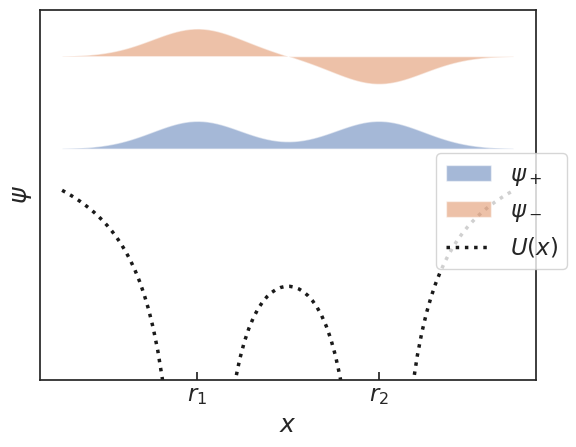

In [ ]:
fig, ax = pyplot.subplots()
x = np.linspace(-1, 4, 100)
r_1, r_2 = 0.5, 2.51
U = -1/np.abs(x - r_1) - 1/np.abs(x - r_2)
psi_1 = 0.3 * np.exp(-2*(x - r_1)**2)
psi_2 = 0.3 * np.exp(-2*(x - r_2)**2)
pyplot.fill_between(x, psi_1 + psi_2 - .5, -.5, alpha=.5, label=r"$\psi_+$")
pyplot.fill_between(x, psi_1 - psi_2 + .5, .5, alpha=.5, label=r"$\psi_-$")
pyplot.plot(x, U, label="$U(x)$", c='k', linestyle=':')
pyplot.xlabel("$x$")
pyplot.ylabel(r"$\psi$")
pyplot.legend(loc=(0.8, 0.3))
pyplot.ylim(-3, 1)
pyplot.xticks([r_1, r_2], ["$r_1$", "$r_2$"])
pyplot.yticks([])


Se diminuirmos a distância interatômica, os dois átomos se aproximam e seus orbitais atômicos começam a se sobrepor mais.  
Esse aumento na sobreposição dos orbitais aumenta o salto (hopping) $t$.  
Abaixo, representamos graficamente as energias dos estados simétrico e antissimétrico como função da distância interatômica:

Quando um elétron (ou dois, pois há dois estados com spins opostos) ocupa $|\psi_+\rangle$, os átomos se atraem (ou formam uma *ligação*), pois a energia total é reduzida.  
Portanto, se $t$ é positivo, $|\psi_+\rangle$ é chamado de **orbital ligante**.

Se um elétron ocupa o orbital $|\psi_{-}\rangle$, a energia molecular aumenta com a diminuição da distância interatômica.  
Isso significa que os átomos se repelem.  
Assim, se $t$ é positivo, $|\psi_{-}\rangle$ é chamado de **orbital antiligante**.

Portanto, se cada átomo tem um único elétron na camada de valência, esses átomos se atraem, pois o orbital ligante acomoda dois elétrons com spins opostos.  
Por outro lado, se cada átomo tiver 0 ou 2 elétrons na camada de valência, a força resultante dos orbitais ligante e antiligante se anula — mas a repulsão de Coulomb permanece.


[]

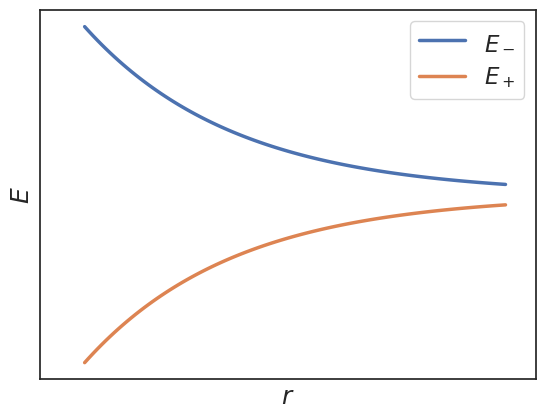

In [ ]:
fig, ax = pyplot.subplots()
r = np.linspace(0.2, 3, 100)
U = np.exp(-r)
ax.plot(r, + U, label="$E_-$")
ax.plot(r, - U, label="$E_+$")
ax.set_xlabel("$r$")
ax.set_ylabel("$E$")
ax.set_xlim(-.1, 3.2)
ax.legend()
ax.set_xticks([])
ax.set_yticks([])

O modelo LCAO se generaliza de forma muito simples.  
Vamos considerar a seguinte função de onda:

$$
\vert \psi\rangle = c_1 |1\rangle + c_2 |2\rangle + c_3 |3\rangle.
$$

Como os três átomos são idênticos, a energia local (onsite) é a mesma em todos:  
$\langle 1|H|1 \rangle = \langle 2|H|2 \rangle = \langle 3|H|3 \rangle = E_0$.  
Além disso, assumimos hopping apenas entre vizinhos mais próximos, e que ele é real:  
$\langle 1|H|2 \rangle = \langle 2|H|3 \rangle = -t$.  
Também assumimos que os orbitais são ortogonais entre si.

Assim como fizemos na aula anterior, usamos a equação de Schrödinger $H |\psi\rangle = E |\psi\rangle$ para montar um sistema de equações:

\begin{align*}
E c_1 &= E_0 c_1 - t c_2\\
E c_2 &= E_0 c_2 - t c_1 - t c_3\\
E c_3 &= E_0 c_3 - t c_2.
\end{align*}

Novamente, escrevemos isso na forma matricial:

$$
E \begin{pmatrix}
c_1 \\ c_2 \\ c_3
\end{pmatrix} =
\begin{pmatrix}
E_0 & -t & 0 \\
-t & E_0 & -t \\
0 & -t & E_0
\end{pmatrix}
\begin{pmatrix}
c_1 \\ c_2 \\ c_3
\end{pmatrix}.
$$


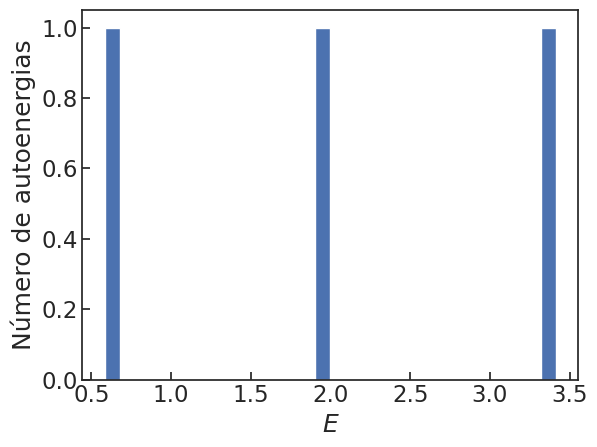

In [ ]:
def DOS_finite_electron_chain(n):
    rhs = 2 * np.eye(n, k = 0) - np.eye(n, k = 1) - np.eye(n, k = -1)
    pyplot.figure()
    pyplot.hist(np.linalg.eigvalsh(rhs), bins=30)
    pyplot.xlabel("$E$")
    pyplot.ylabel("Número de autoenergias")

DOS_finite_electron_chain(3)


### Rede com N orbitais

[]

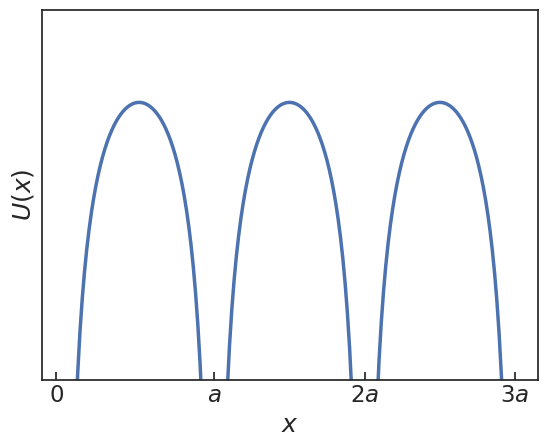

In [ ]:
x = np.linspace(0.001, 3, 200)

fig, ax = pyplot.subplots(1, 1)
ax.plot(x, 1.2-1/np.abs(np.sin(np.pi * x))**(1/2))
ax.set_ylim(-.7, .5)
ax.set_xlabel("$x$")
ax.set_ylabel("$U(x)$")
ax.set_xticks([-.05, 1, 2, 3])
ax.set_xticklabels(["$0$", "$a$", "$2a$","$3a$"])
ax.set_yticks([])



De forma semelhante ao caso do sistema triatômico, formulamos o orbital molecular via o modelo LCAO:

$$
\vert \Psi \rangle = \sum_n c_n |n \rangle.
$$

Assumimos apenas hopping entre vizinhos mais próximos, com valor $-t$, e uma energia local $E_0$.  
A equação de Schrödinger acoplada para o orbital $|n \rangle$ é:

$$
E c_n = E_0 c_n - t c_{n+1} - t c_{n-1}.
$$

Novamente, as condições de contorno periódicas implicam que $\phi_N = \phi_0$.  
Para resolver as equações de movimento, precisamos fazer uma suposição razoável.  
Se olharmos para a equação, veremos que ela é a mesma para todos os átomos.  
Mais especificamente, a estrutura da equação é idêntica, independentemente do valor de $n$ que escolhemos.  
Como a equação define as soluções, inferimos que as soluções também devem ser independentes da escolha de $n$.  
Como resultado, assumimos uma solução do tipo onda plana, também chamada de *ansatz de onda plana*, com a mesma amplitude para cada átomo.



Escrevemos $x_n = na$.

Já sabemos que as condições de contorno periódicas só permitem ondas planas com $k$ múltiplo de $2\pi / L$.  
As condições de contorno periódicas impõem $\phi_0 = \phi_N$, o que resulta em:

$$
1 = e^{ik0} = e^{ikNa}.
$$

A equação acima define os valores permitidos de $k$:

$$
k = \frac{2 \pi p}{Na}, \quad \text{com } p \in \mathbb{Z}.
$$

Usamos os valores quantizados de $k$ no nosso ansatz de onda plana:  
$e^{ikx_n} = e^{i p \frac{2\pi}{Na} n a} = e^{i \frac{2 \pi n p}{N}}$.

Notamos algo interessante ao investigar o caso $p \to p+N$.  
Nesse caso, o ansatz torna-se $e^{i \frac{2\pi n(p+N)}{N}} = e^{i \frac{2\pi np}{N} + i2\pi n} = e^{i \frac{2\pi np}{N}}$, que é exatamente a mesma solução.  
Contando o número de ondas planas inequivocamente diferentes, encontramos exatamente $N$ soluções distintas no total.  
Tudo o que falta é encontrar a energia de cada solução!

A razão pela qual soluções com diferentes valores de $k$ são idênticas é explicada pelo fenômeno de [aliasing](https://pt.wikipedia.org/wiki/Aliasing):  
como a onda plana é definida apenas em posições discretas, adquirir um fator de fase de $2\pi$ entre dois átomos é equivalente a nada acontecer.


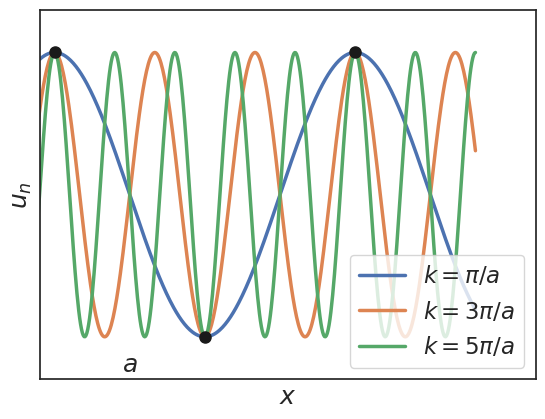

In [ ]:
x = np.linspace(-.2, 2.8, 500)
fig, ax = pyplot.subplots()
ax.plot(x, np.cos(np.pi*(x)), label=r'$k=\pi/a$')
ax.plot(x, np.cos(3*np.pi*(x)), label=r'$k=3\pi/a$')
ax.plot(x, np.cos(5*np.pi*(x)), label=r'$k=5\pi/a$')
sites = np.arange(3)
ax.scatter(sites, np.cos(np.pi*(sites)), c='k', s=64, zorder=5)
ax.set_xlabel('$x$')
ax.set_ylabel('$u_n$')
ax.set_xlim((-.1, 3.2))
ax.set_ylim((-1.3, 1.3))
ax.set_xticks([])
ax.set_yticks([])
ax.legend(loc='lower right')
ax.annotate('', xy=(0, -1.1), xytext=(1, -1.1),
            arrowprops=dict(arrowstyle='<->', shrinkA=0, shrinkB=0))
ax.text(.5, -1.25, '$a$', ha='center');


## Elétrons

Mais uma vez, substituímos o ansatz de onda plana nas equações de movimento:

$$
E Ae^{- ikna} = E_0 Ae^{ - ikna} - t Ae^{- ik(n+1)a} - t Ae^{- ik(n-1)a},
$$

Novamente, não estamos interessados em uma solução trivial, portanto assumimos $A \neq 0$ e, assim:

$$
E = E_0 - t e^{-ika} - t e^{ika} = E_0 - 2t\cos(ka),
$$

o que nos fornece a seguinte relação de dispersão:




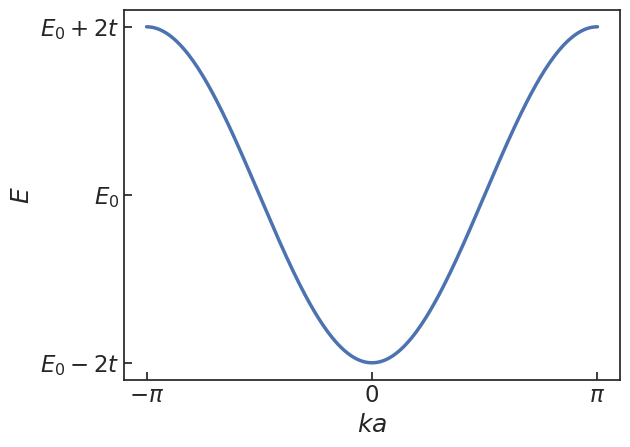

In [ ]:
pyplot.figure()
k = np.linspace(-np.pi, np.pi, 300)
pyplot.plot(k, -np.cos(k))
pyplot.xlabel('$ka$'); pyplot.ylabel('$E$')
pyplot.xticks([-np.pi, 0, np.pi], [r'$-\pi$', 0, r'$\pi$'])
pyplot.yticks([-1, 0, 1], ['$E_0-2t$', '$E_0$', '$E_0+2t$']);

A dispersão eletrônica consiste em uma banda de energias permitidas $E_0 - 2t < E < E_0 + 2t$.
A relação de dispersão também é frequentemente chamada de estrutura de bandas.
Devido à degenerescência de spin, cada banda possui $2N$ estados possíveis se considerarmos um sistema com $N$ átomos.

Se cada átomo contém 2 elétrons e apenas um orbital, todos os estados da banda devem estar ocupados pelos elétrons. Se todos os estados disponíveis estão preenchidos, não importa o que façamos, nosso sistema é incapaz de conduzir elétrons e ele é um isolantes.

Vamos também comparar a estrutura de bandas dos elétrons com o modelo do elétron livre.
Focando na relação de dispersão próxima ao fundo da banda em $k = 0$, aproximamos a energia como:
$$
E \approx E_0 - 2t + t (ka)^2.
$$

Se compararmos com a relação de dispersão $E = \hbar^2 k^2 / 2m$ do modelo de elétrons livres, vemos que a estrutura de bandas é semelhante, mas a menor energia disponível é $E_0 - 2t$ em vez de $0$, e os elétrons se comportam como se tivessem uma massa efetiva diferente: $m^* = \hbar^2 / 2ta^2$.


### Densidade de estados

A densidade de estados (DOS) é o número de estados por unidade de energia. Em 1D temos:

$$
g(E) = \frac{L}{2\pi}\sum \left|\frac{dk}{dE}\right| = \frac{L}{2\pi \hbar}\sum |v|^{-1}
$$

A soma é feita sobre todos os valores possíveis de \$k\$ e de spin que correspondem à mesma energia \$E\$.
Se estivermos trabalhando em duas ou mais dimensões, devemos integrar sobre os valores de \$k\$ que correspondem à mesma energia.
Também vale notar que, para energias abaixo de \$E\_0 - 2t\$ ou acima de \$E\_0 + 2t\$, não há valores de \$k\$ correspondentes — logo, não há nada a somar.

Mais uma vez, partindo de:

$$
E = E_0 - 2t \cos(ka),
$$

obtemos:

$$
ka = \pm \arccos\left[-\frac{(E - E_0)}{2t}\right],
$$

e

$$
|v|^{-1} = \hbar \left|\frac{dk}{dE} \right| = \frac{\hbar}{a} \frac{1}{\sqrt{4t^2 - (E - E_0)^2}}.
$$

Você pode chegar a esse resultado diretamente se lembrar da derivada da função arco-cosseno. Caso contrário, é necessário seguir o caminho longo: calcular \$dE/dk\$ como função de \$k\$, expressar \$k\$ em função de \$E\$ como fizemos acima e tomar o inverso.

Agora somamos as contribuições dos momentos positivos e negativos, bem como de ambas as orientações de spin, e obtemos a densidade de estados:

$$
g(E) = \frac{L}{2\pi} \cdot \frac{4}{a} \cdot \frac{1}{\sqrt{4t^2 - (E - E_0)^2}}.
$$

Uma verificação rápida: quando a energia está próxima do fundo da banda, \$E = E\_0 - 2t + \delta E\$, temos \$g(E) \propto \delta E^{-1/2}\$, como esperado em 1D.

O processo para calcular a densidade de estados em uma energia \$E\$ de um Hamiltoniano independente de spin é feito sistematicamente com os seguintes passos:

1. Para uma dada energia \$E\$, determine *todos* os valores de \$k\$ que correspondem a esse \$E\$ usando a relação de dispersão.
2. Calcule \$\left|dk / dE\right|\$. Faça isso escrevendo \$k\$ como uma função (multivalorada) de \$E\$ e diferenciando, ou calculando \$(dE / dk)^{-1}\$.
3. Some ou integre \$dk / dE\$ sobre os valores permitidos de \$k\$ encontrados no passo 1 e multiplique pelas degenerescências (spin).

